In [1]:
# I want to see how the expected SFS changes when I change the bottleneck size 

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import moments

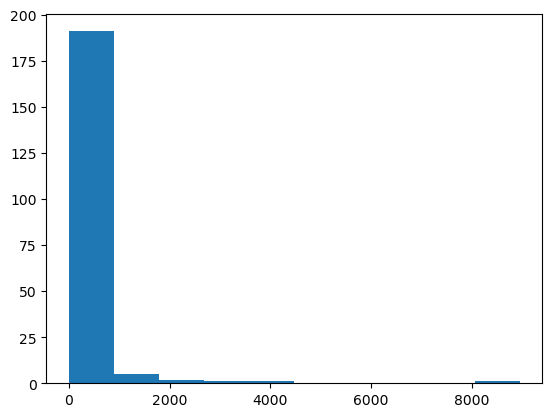

In [33]:
input_theta = 10000

# Let's define the ground truth parameter values. We will try to recover these values using the moments optimization procedure.

sampled_params = {}

sampled_params['N0'] = 10000
sampled_params['Nb'] = 7000
sampled_params['N_recover'] = 9000
sampled_params['t_bottleneck_end'] = 400
sampled_params['t_bottleneck_start'] = 600


nuB = sampled_params['Nb']/sampled_params['N0']
nuF = sampled_params['N_recover']/sampled_params['N0']
TB = (sampled_params['t_bottleneck_start'] - sampled_params['t_bottleneck_end'])/(2*sampled_params['N0'])
TF = sampled_params['t_bottleneck_end']/(2*sampled_params['N0'])

params = [nuB, nuF, TB, TF]
model_func = moments.Demographics1D.three_epoch
model = model_func(params, [200])
model = input_theta * model
data = model.sample()

plt.figure()
plt.hist(np.array(data))
plt.show()
# plt.savefig('bottleneck_sfs.png')


In [34]:
p_guess = [0.75, 0.85, 0.1, 0.01]
lower_bound = [1e-4, 1e-4, 1e-4, 1e-4]
upper_bound = [1, 1, 1, 1]

p_guess = moments.Misc.perturb_params(
    p_guess, lower_bound=lower_bound, upper_bound=upper_bound)

opt_params = moments.Inference.optimize_log_fmin(
    p_guess, data, model_func,
    lower_bound=lower_bound, upper_bound=upper_bound,
    verbose=20) # report every 20 iterations


3680    , -823.259    , array([ 0.8073     ,  0.739698   ,  0.0192288  ,  0.0158013  ])
3700    , -783.611    , array([ 0.807887   ,  0.809228   ,  0.0246729  ,  0.00236784 ])
3720    , -779.959    , array([ 0.811241   ,  0.854101   ,  0.0229018  ,  0.00174748 ])
3740    , -775.192    , array([ 0.866467   ,  0.858801   ,  0.0368333  ,  0.000170569])
3760    , -774.403    , array([ 0.862523   ,  0.870318   ,  0.0425143  ,  0.000121205])
3780    , -774.249    , array([ 0.86074    ,  0.866176   ,  0.0471571  ,  0.000114522])
3800    , -774.039    , array([ 0.869451   ,  0.84127    ,  0.0507331  ,  0.000113521])
3820    , -774.006    , array([ 0.867978   ,  0.844291   ,  0.0538842  ,  0.00010632 ])
3840    , -773.998    , array([ 0.870053   ,  0.837913   ,  0.0543199  ,  0.000109157])
3860    , -773.996    , array([ 0.869982   ,  0.838854   ,  0.054409   ,  0.000107661])
3880    , -773.993    , array([ 0.87014    ,  0.841629   ,  0.0546687  ,  0.000101776])
3900    , -773.992    , array([ 

In [35]:
print(f'Found params: {opt_params}')
print(f'Actual Params: {params}')

Found params: [8.69601888e-01 8.45009520e-01 5.41798943e-02 1.00000002e-04]
Actual Params: [0.7, 0.9, 0.01, 0.02]


In [ ]:
# Bottleneck size, recovery size, TB, TF